In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
oneHotEncoder = OneHotEncoder()
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [116]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [117]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
                'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [118]:
test_set.columns = col_labels

In [134]:
test_set = test_set.drop(columns=['education'])
train_set = train_set.drop(columns=['education'])

In [154]:
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [158]:
test_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,1


# preprocessing

In [121]:
test_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [122]:
train_set.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [123]:
test_set.wage_class.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [124]:
train_set.wage_class = train_set.wage_class.map({' <=50K':1,' >50K':0})

In [125]:
test_set.wage_class = test_set.wage_class.map({' <=50K.':1,' >50K.':0})

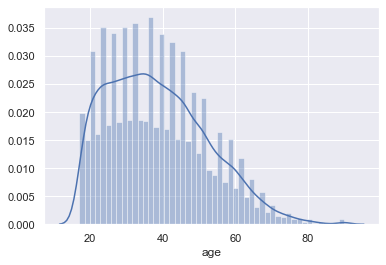

In [126]:
sns.distplot(train_set.age)

In [127]:
train_set.education_num.unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Divorced',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [ ]:
train_set = train_set[train_set.occupation != ' ?' ]
test_set = test_set[test_set.occupation != ' ?' ]

In [150]:
train_set = train_set[train_set.native_country != ' ?' ]
test_set = test_set[test_set.native_country != ' ?' ]

In [156]:
train = pd.get_dummies(train_set, columns = ['workclass','marital_status','occupation', 'relationship', 'race', 'sex','native_country'] , prefix_sep = "_",drop_first = True)
test  = pd.get_dummies(test_set, columns = ['workclass','marital_status','occupation', 'relationship', 'race', 'sex','native_country'] , prefix_sep = "_",drop_first = True)

# Model 

In [184]:
X=train.drop(columns=['wage_class'])

In [185]:
Y=train.iloc[:,6:7]

In [186]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=42)

In [187]:
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)

C:\Users\ketan\Anaconda3\envs\yourenvname\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ketan\Anaconda3\envs\yourenvname\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [188]:
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.8628806896225074

In [189]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8623052270969168

In [192]:
from sklearn.model_selection import GridSearchCV

In [196]:
param_grid={
   
    ' learning_rate':[0.1,0.01,0.02],
    'max_depth': [3,5],
    'n_estimators':[100,200]
    
}

In [197]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [198]:
grid.fit(train_x,train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ketan\Anaconda3\envs\yourenvname\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ketan\Anaconda3\envs\yourenvname\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.865, total=   5.2s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.867, total=   4.6s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.8s remaining:    0.0s


[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.853, total=   4.6s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.854, total=   5.4s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.859, total=   6.2s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.872, total=  10.7s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.870, total=  10.7s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.859, total=  11.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.859, 

[CV]   learning_rate=0.02, max_depth=5, n_estimators=200, score=0.871, total=  14.9s
[CV]  learning_rate=0.02, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.02, max_depth=5, n_estimators=200, score=0.874, total=  25.5s
[CV]  learning_rate=0.02, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.02, max_depth=5, n_estimators=200, score=0.861, total=  25.5s
[CV]  learning_rate=0.02, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.02, max_depth=5, n_estimators=200, score=0.862, total=  25.5s
[CV]  learning_rate=0.02, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.02, max_depth=5, n_estimators=200, score=0.867, total=  22.3s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 14.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [0.1, 0.01, 0.02],
                         'max_depth': [3, 5], 'n_estimators': [100, 200]},
             pre_dispatch='2*n_jobs',

In [199]:
grid.best_params_

{' learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [200]:
new_model=XGBClassifier(learning_rate= 0.1 , max_depth= 5, n_estimators= 100)
new_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [201]:
y_pred_new = new_model.predict(test_x)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(test_y,predictions_new)
accuracy_new


0.8694883412531772